In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

*Full Image*

In [8]:
# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Full Image ROI.csv"
df = pd.read_csv(url, header=0)

Accuracy on val set: 94.74%
Classification report on validation set:
              precision    recall  f1-score   support

        good       0.97      0.98      0.97       166
      reject       0.00      0.00      0.00         5

    accuracy                           0.95       171
   macro avg       0.49      0.49      0.49       171
weighted avg       0.94      0.95      0.94       171



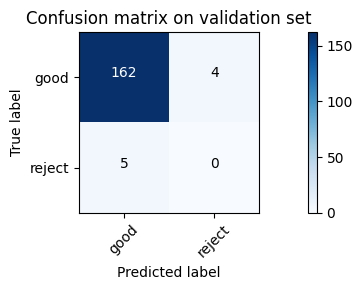

In [13]:
# Memisahkan fitur dan label
xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], axis=1)
yData = df['category']

# Mengonversi data ke numpy array
X = xData.to_numpy()
y = yData.to_numpy()

# Membagi dataset menjadi data pelatihan+validasi (60%) dan data pengujian (40%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membagi data pelatihan+validasi menjadi data pelatihan (80% dari 60%) dan data validasi (20% dari 60%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Membuat model Decision Tree dengan GridSearchCV untuk penyetelan hyperparameter
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mengevaluasi model terbaik pada data validasi
best_tree = grid_search.best_estimator_
val_pred = best_tree.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Accuracy on val set: {val_accuracy * 100 :.2f}%")

val_conf_matrix = confusion_matrix(y_val, val_pred)
val_classification_rep = classification_report(y_val, val_pred)
print("Classification report on validation set:")
print(val_classification_rep)

# Membuat plot matriks kebingungan untuk data validasi
plt.figure(figsize=(10, 3))
plt.imshow(val_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion matrix on validation set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_val)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = val_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if val_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(val_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()

# Melakukan prediksi pada data pengujian menggunakan model terbaik
y_pred = best_tree.predict(X_test)




Accuracy on test set: 94.04%
Classification report on test set:
              precision    recall  f1-score   support

        good       0.97      0.97      0.97       551
      reject       0.00      0.00      0.00        19

    accuracy                           0.94       570
   macro avg       0.48      0.49      0.48       570
weighted avg       0.93      0.94      0.94       570



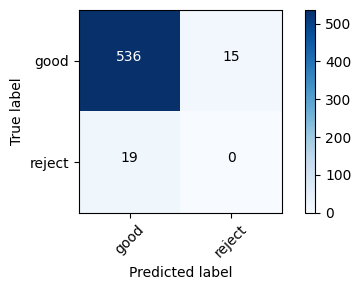

In [14]:
# Mengukur kinerja model pada data pengujian
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy * 100:.2f}%")

test_conf_matrix = confusion_matrix(y_test, y_pred)
test_classification_rep = classification_report(y_test, y_pred)
print("Classification report on test set:")
print(test_classification_rep)

# Membuat plot matriks kebingungan untuk data pengujian
plt.figure(figsize=(5,3))
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
# plt.title('Confusion matrix on test set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_test)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = test_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if test_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(test_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()

*Bottle ROI*

Acuracy on val set: 94.74%
Classification report on val set:
              precision    recall  f1-score   support

        good       0.97      0.98      0.97       166
      reject       0.00      0.00      0.00         5

    accuracy                           0.95       171
   macro avg       0.49      0.49      0.49       171
weighted avg       0.94      0.95      0.94       171



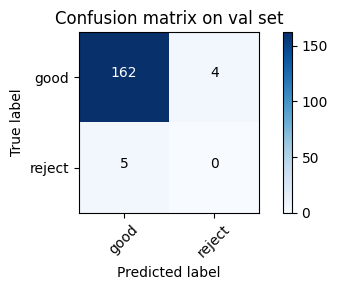

Accuracy on test set: 94.04%
Classification report on test set:
              precision    recall  f1-score   support

        good       0.97      0.97      0.97       551
      reject       0.00      0.00      0.00        19

    accuracy                           0.94       570
   macro avg       0.48      0.49      0.48       570
weighted avg       0.93      0.94      0.94       570



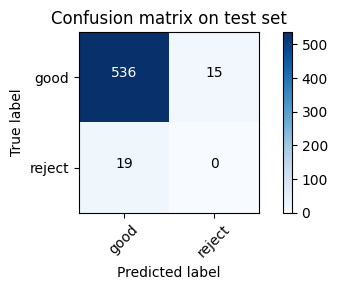

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Bottle ROI.csv"
df = pd.read_csv(url, header=0)

# Memisahkan fitur dan label
xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], axis=1)
yData = df['category']

# Mengonversi data ke numpy array
X = xData.to_numpy()
y = yData.to_numpy()

# Membagi dataset menjadi data pelatihan+validasi (60%) dan data pengujian (40%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membagi data pelatihan+validasi menjadi data pelatihan (80% dari 60%) dan data validasi (20% dari 60%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Membuat model Decision Tree dengan GridSearchCV untuk penyetelan hyperparameter
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mengevaluasi model terbaik pada data validasi
best_tree = grid_search.best_estimator_
val_pred = best_tree.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Acuracy on val set: {val_accuracy * 100 :.2f}%")

val_conf_matrix = confusion_matrix(y_val, val_pred)
val_classification_rep = classification_report(y_val, val_pred)
print("Classification report on val set:")
print(val_classification_rep)

# Membuat plot matriks kebingungan untuk data validasi
plt.figure(figsize=(5, 3))
plt.imshow(val_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion matrix on val set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_val)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = val_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if val_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(val_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()

# Melakukan prediksi pada data pengujian menggunakan model terbaik
y_pred = best_tree.predict(X_test)

# Mengukur kinerja model pada data pengujian
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy * 100:.2f}%")

test_conf_matrix = confusion_matrix(y_test, y_pred)
test_classification_rep = classification_report(y_test, y_pred)
print("Classification report on test set:")
print(test_classification_rep)

# Membuat plot matriks kebingungan untuk data pengujian
plt.figure(figsize=(5, 3))
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion matrix on test set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_test)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = test_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if test_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(test_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()


*Measurement Scale Only*

Accuracy on val set: 97.08%
Classification Report on val set:
              precision    recall  f1-score   support

        good       0.98      0.99      0.98       166
      reject       0.50      0.40      0.44         5

    accuracy                           0.97       171
   macro avg       0.74      0.69      0.71       171
weighted avg       0.97      0.97      0.97       171



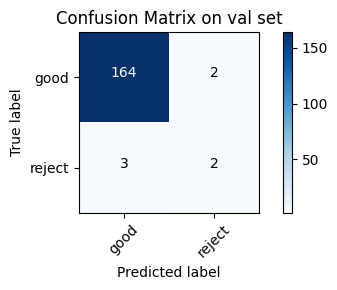

Accuracy on test set: 98.25%
Classification Report (test set):
              precision    recall  f1-score   support

        good       0.99      0.99      0.99       551
      reject       0.74      0.74      0.74        19

    accuracy                           0.98       570
   macro avg       0.86      0.86      0.86       570
weighted avg       0.98      0.98      0.98       570



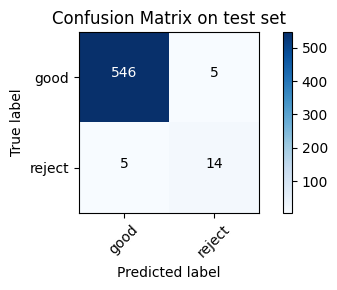

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Fullprint ROI.csv"
df = pd.read_csv(url, header=0)

# Memisahkan fitur dan label
xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], axis=1)
yData = df['category']

# Mengonversi data ke numpy array
X = xData.to_numpy()
y = yData.to_numpy()

# Membagi dataset menjadi data pelatihan+validasi (60%) dan data pengujian (40%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membagi data pelatihan+validasi menjadi data pelatihan (80% dari 60%) dan data validasi (20% dari 60%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Membuat model Decision Tree dengan GridSearchCV untuk penyetelan hyperparameter
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mengevaluasi model terbaik pada data validasi
best_tree = grid_search.best_estimator_
val_pred = best_tree.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f"Accuracy on val set: {val_accuracy * 100 :.2f}%")

val_conf_matrix = confusion_matrix(y_val, val_pred)
val_classification_rep = classification_report(y_val, val_pred)
print("Classification Report on val set:")
print(val_classification_rep)

# Membuat plot matriks kebingungan untuk data validasi
plt.figure(figsize=(5, 3))
plt.imshow(val_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix on val set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_val)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = val_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if val_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(val_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()

# Melakukan prediksi pada data pengujian menggunakan model terbaik
y_pred = best_tree.predict(X_test)

# Mengukur kinerja model pada data pengujian
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {test_accuracy * 100:.2f}%")

test_conf_matrix = confusion_matrix(y_test, y_pred)
test_classification_rep = classification_report(y_test, y_pred)
print("Classification Report (test set):")
print(test_classification_rep)

# Membuat plot matriks kebingungan untuk data pengujian
plt.figure(figsize=(5, 3))
plt.imshow(test_conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix on test set')
plt.colorbar()

unique_labels = [str(label) for label in np.unique(y_test)]
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Mengatur warna teks berdasarkan warna latar belakang
threshold = test_conf_matrix.max() / 2  # Menentukan threshold untuk membedakan warna teks

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        color = "white" if test_conf_matrix[i, j] > threshold else "black"
        plt.text(j, i, format(test_conf_matrix[i, j], 'd'), horizontalalignment="center", color=color)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Fullprint ROI.csv"
df = pd.read_csv(url, header=0)

xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], 1) 
yData = df['category']

X = pd.DataFrame(xData).to_numpy()
y = pd.DataFrame(yData).to_numpy()

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# pca = PCA(n_components=8)  # You can adjust the explained variance threshold
# X_pca = pca.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the unique values in y_test and y_pred to strings
unique_labels = [str(label) for label in np.unique(y_test)]

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Create the confusion matrix plot with string labels
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="black")

plt.tight_layout()
plt.show()


TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'OZ_Colortone Fullprint.pkl')
# joblib.dump(pca, 'OZ_Colortone Fullprint PCA.pkl')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Full Image ROI.csv"
df = pd.read_csv(url, header=0)

xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], 1) 
yData = df['category']

X = pd.DataFrame(xData).to_numpy()
y = pd.DataFrame(yData).to_numpy()

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# pca = PCA(n_components=8)  # You can adjust the explained variance threshold
# X_pca = pca.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the unique values in y_test and y_pred to strings
unique_labels = [str(label) for label in np.unique(y_test)]

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Create the confusion matrix plot with string labels
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="black")

plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'OZ_Colortone Full Image.pkl')
# joblib.dump(pca, 'OZ_Colortone Fullprint PCA.pkl')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Membaca data dari file CSV
url = "OZ_All file GLCM Analysis_Bottle ROI.csv"
df = pd.read_csv(url, header=0)

xData = df.drop(['number', 'Filename', 'category', 'class', 'duration'], 1) 
yData = df['category']

X = pd.DataFrame(xData).to_numpy()
y = pd.DataFrame(yData).to_numpy()

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# pca = PCA(n_components=8)  # You can adjust the explained variance threshold
# X_pca = pca.fit_transform(X)

# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Membuat model Decision Tree
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

# Convert the unique values in y_test and y_pred to strings
unique_labels = [str(label) for label in np.unique(y_test)]

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Create the confusion matrix plot with string labels
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels, rotation=45)
plt.yticks(tick_marks, unique_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(len(unique_labels)):
    for j in range(len(unique_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="black")

plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'OZ_Colortone Bottle ROI.pkl')
# joblib.dump(pca, 'OZ_Colortone Fullprint PCA.pkl')